# Redução de Dimensionalidade para Visualização de Dados em Problemas Multivariados
## Entenda como visualizar dados de mais de 3 dimensões
***

Material do artigo publicado em https://www.linkedin.com/pulse/redução-de-dimensionalidade-para-visualização-dados-em-marques/

### Importar bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

% matplotlib inline

### Carregar conjunto de dados

In [2]:
dataset = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
dataset.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
73,6.1,2.8,4.7,1.2,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor


### Gerar gráficos de dispersão em pares

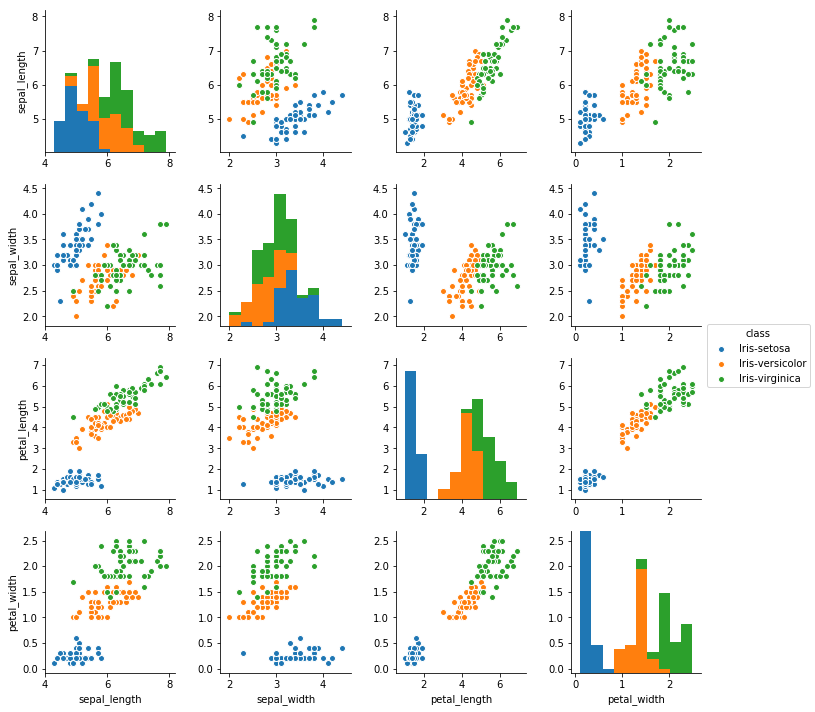

In [3]:
sns.pairplot(dataset, hue='class')

### Reduzir dataset para 2 dimensões

In [4]:
pca = PCA(2)
datasetPCA = pca.fit_transform(dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
datasetPCA = pd.DataFrame({'pc1': datasetPCA[:, 0], 'pc2': datasetPCA[:, 1], 'class': dataset['class']})

datasetPCA.head()

,class,pc1,pc2
0,Iris-setosa,-2.684207,0.326607
1,Iris-setosa,-2.715391,-0.169557
2,Iris-setosa,-2.889820,-0.137346
3,Iris-setosa,-2.746437,-0.311124
4,Iris-setosa,-2.728593,0.333925


### Verificar a taxa de variância explicada pelos 2 componentes principais

In [5]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

 ### Gerar gráfico de dispersão para os 2 componentes principais

In [6]:
setosa = datasetPCA[datasetPCA['class'] == 'Iris-setosa']
versicolor = datasetPCA[datasetPCA['class'] == 'Iris-versicolor']
virginica = datasetPCA[datasetPCA['class'] == 'Iris-virginica']

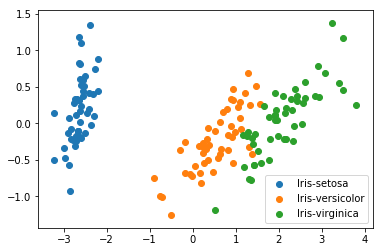

In [7]:
plt.scatter(x=setosa['pc1'], y=setosa['pc2'])
plt.scatter(x=versicolor['pc1'], y=versicolor['pc2'])
plt.scatter(x=virginica['pc1'], y=virginica['pc2'])
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])